In [457]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import Image
import pydotplus

In [458]:
df = pd.read_csv('./train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [459]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [460]:
'''
'PassengerId', 'Identificación del pasajero',
'Survived', 'Sobrevivió',
'Pclass', 'Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd'
'Name', 'Nombre',
'Sex', 'Sexo',
'Age', 'Edad', 
'SibSp', 'Número de hermanos/cónyuges a bordo del Titanic'    
'Parch', 'Número de padres/hijos a bordo del Titanic'
'Ticket', 'Boleto',
'Fare', 'Tarifa de pasajero'
'Cabin', 'Cabina',
'Embarked', 'Embarcado'
'''

"\n'PassengerId', 'Identificación del pasajero',\n'Survived', 'Sobrevivió',\n'Pclass', 'Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd'\n'Name', 'Nombre',\n'Sex', 'Sexo',\n'Age', 'Edad', \n'SibSp', 'Número de hermanos/cónyuges a bordo del Titanic'    \n'Parch', 'Número de padres/hijos a bordo del Titanic'\n'Ticket', 'Boleto',\n'Fare', 'Tarifa de pasajero'\n'Cabin', 'Cabina',\n'Embarked', 'Embarcado'\n"

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [462]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [463]:
df.bfill(inplace=True)

In [464]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [465]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [466]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [467]:
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [468]:
df.groupby(['Survived','Sex','Pclass']).size()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
dtype: int64

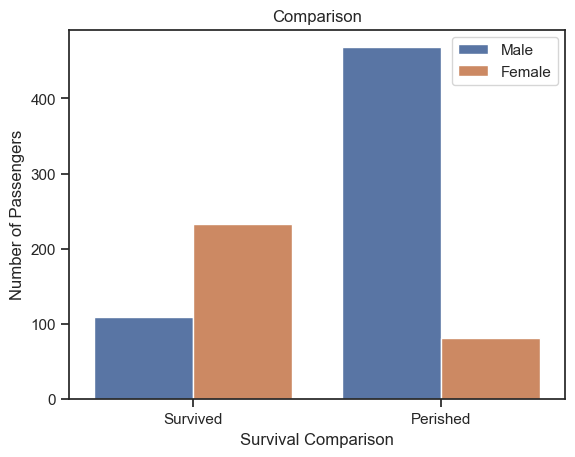

In [469]:
sns.set_theme(style="ticks")
sns.countplot(x= "Survived", hue="Sex", order=[1, 0], data = df).set(xticklabels=["Survived", "Perished"])
plt.xlabel("Survival Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison")
plt.legend(labels=["Male", "Female"])
plt.show()

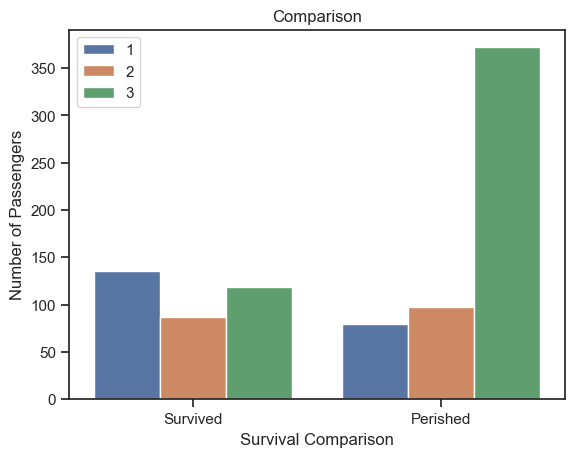

In [470]:
sns.set_theme(style="ticks")
sns.countplot(x= "Survived", hue="Pclass", order=[1, 0], data = df).set(xticklabels=["Survived", "Perished"])
plt.xlabel("Survival Comparison")
plt.ylabel("Number of Passengers")
plt.title("Comparison")
plt.legend(labels=["1", "2","3"])
plt.show()

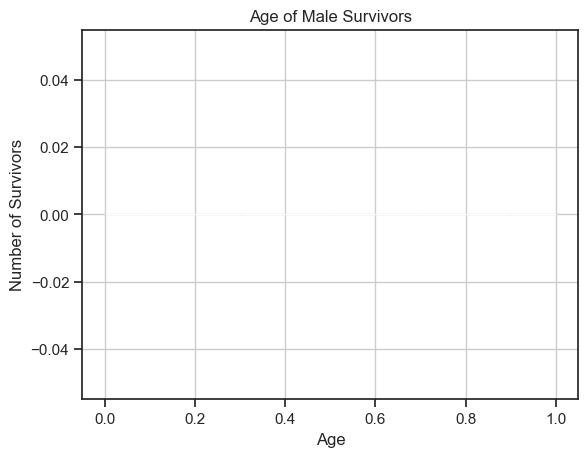

In [471]:
df[(df.Sex == 1) & (df.Survived == 1)].Age.hist()
plt.ylabel('Number of Survivors')
plt.xlabel('Age')
plt.title('Age of Male Survivors');

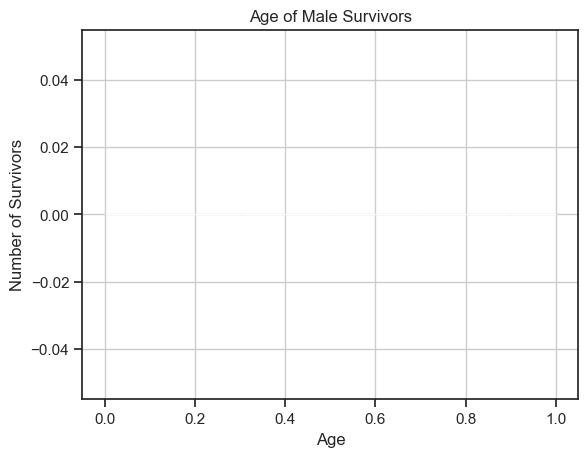

In [472]:
df[(df.Sex == 0) & (df.Survived == 1)].Age.hist()
plt.ylabel('Number of Survivors')
plt.xlabel('Age')
plt.title('Age of Male Survivors');

In [473]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

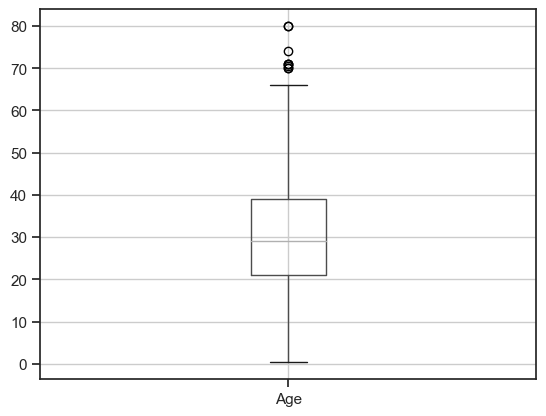

In [474]:
df.boxplot(['Age']);

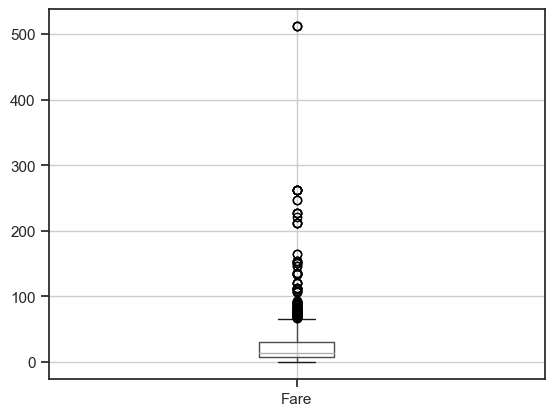

In [475]:
df.boxplot(['Fare']);

In [476]:
x = df[['Pclass','Sex','Age','Fare','Embarked']].values
y = df['Survived'].values

In [477]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [478]:
params = {'max_depth': [2,3,4,5]}
arbol = DecisionTreeClassifier(criterion='entropy',random_state=0)
model = GridSearchCV(arbol,params,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

In [479]:
arbol = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
arbol.fit(x_train,y_train)
y_pred = arbol.predict(x_test)

In [480]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[95, 25],
       [10, 49]], dtype=int64)

In [481]:
print(accuracy_score(y_pred,y_test))

0.8044692737430168


In [482]:
export_graphviz(arbol,out_file='tree_titanic.dot')

In [485]:
feature_names = ['Pclass','Sex','Age','Fare','Embarked']

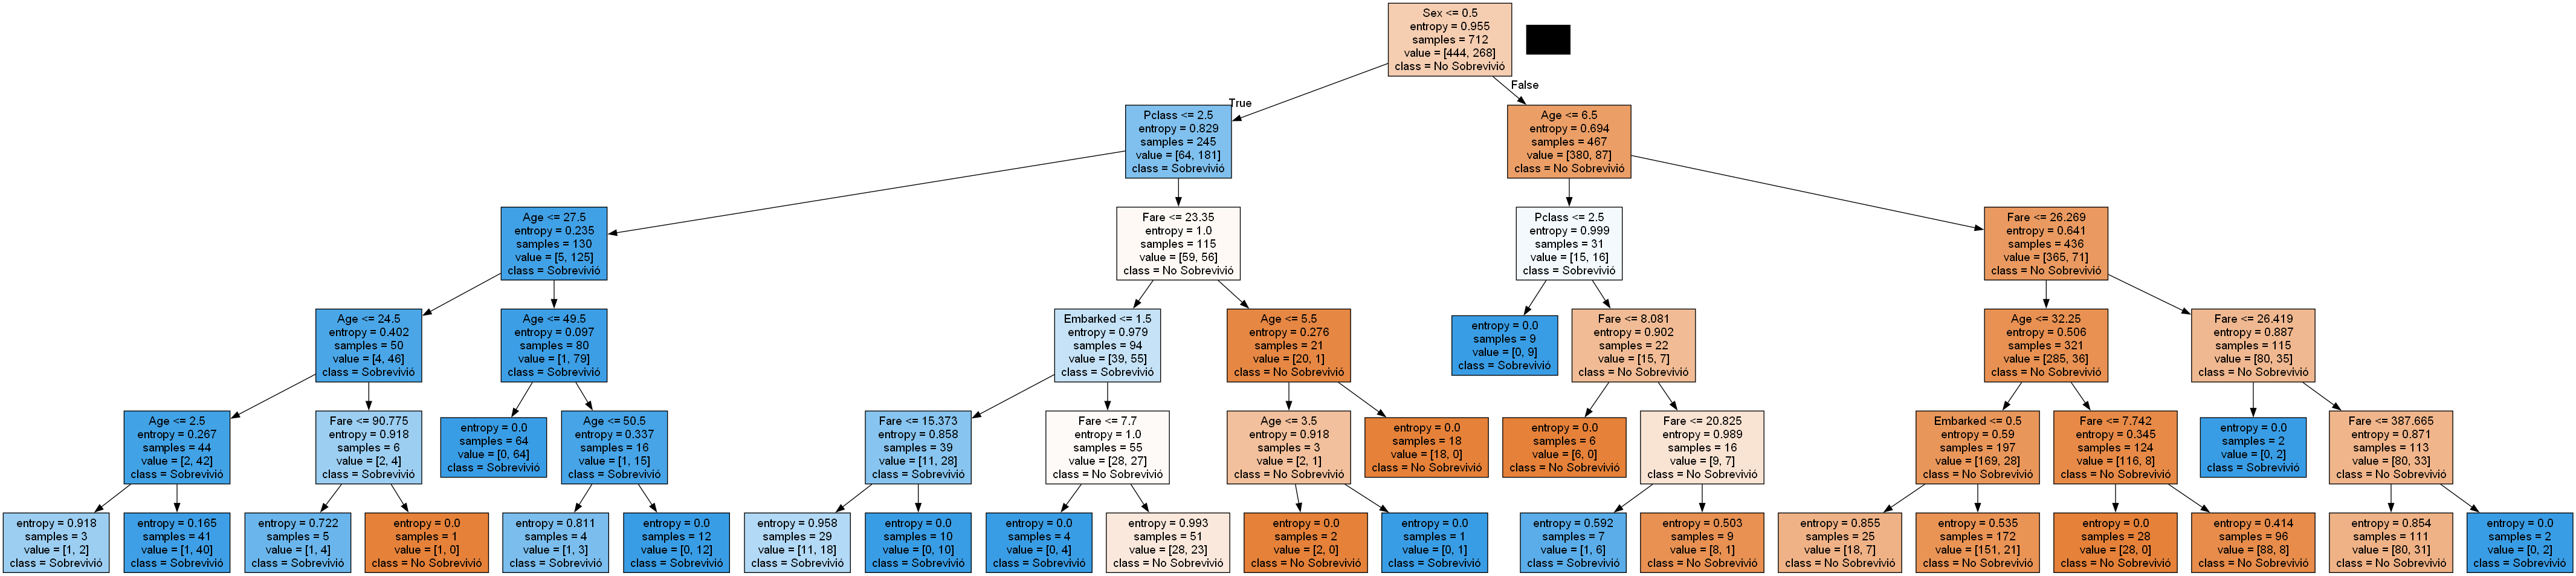

In [486]:
dot_data = export_graphviz(arbol,
                           out_file=None,
                           class_names=['No Sobrevivió','Sobrevivió'],
                           feature_names=feature_names,
                           filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())